In [48]:
from IPython.display import display, HTML
display(HTML ("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}""
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch2. 군집분석</font></b>

# 1절. 군집모델(클러스터링)
- 클러스터(cluster) : 독립변수의 특성이 유사한 데이터의 그룹
- 클러스터링(clustering) : 주어진 데이터를 여러 개의 클러스터로 구분하는 것
1) 중심 기반 클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
style="display: block; margin-left: 0; width: 20%;">
2) 연결기반 클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">
3) 밀도기반 클러스터링(DBSCAN의 변형으로 OPTICS) :
https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">

# 2절 K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 중심점을 찾아가는 알고리즘
- 세부 알고리즘 교안 6page

In [4]:
# 분류를 위한 가상의 데이터 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, # 데이터 갯수
                          n_features=2, # 독립변수 개수(기본값 20)
                          n_informative=2, # 타겟변수에 영향을 미치는 독립변수 갯수
                          n_redundant=0, # 타겟변수에 영향을 미치지 않는 독립변수 갯수
                          n_clusters_per_class=1, # 각 타겟변수 그룹별 서브그룹이 없음
                          n_classes=2, # 타겟변수의 그룹수
                          random_state=123)
import numpy as np
print(X.shape, y.shape)
np.c_[X, y]

(20, 2) (20,)


array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ],
       [ 0.90134424, -0.75896558,  1.        ],
       [ 0.83653082,  1.40488232,  0.        ],
       [-0.02317631, -0.87481215,  1.        ],
       [ 0.83780453, -0.554389  ,  0.        ],
       [-1.9295722 , -1.91894047,  1.        ],
       [-0.8124957 ,  0.61140818,  1.        ],
       [ 1.12694685,  1.69570061,  0.        ],
       [ 0.80138648, -0.28232585,  0.        ],
       [ 0.9399586 ,  1.9518949 ,  0.        ],
       [ 1.24232232,  1.6146173 ,  0.        ],
       [-1.48554751, -0.69890985,  1.        ],
       [ 1.24732102, -1.38872822,  1.        ],
       [-2.95714561, -1.18843377,  1.        ],
       [-1.5849172 , -0.88425569,  1.        ],
       [-2.0197379 , -0.65350646,  1.        ],
       [ 0.98786201,  0.64060416,  0.        ],
       [ 1.17380403,  1.21379918,  0.        ]])

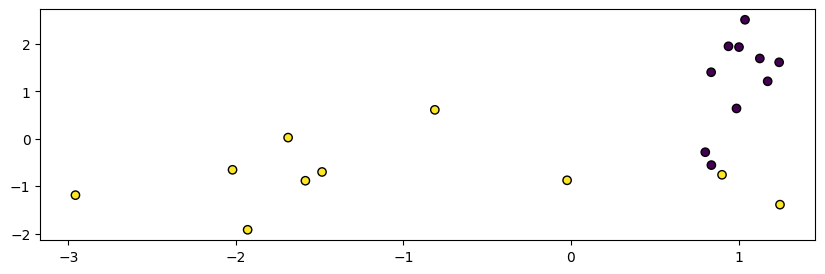

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=y, edgecolors='k')
plt.show()

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, # 군의 갯수
              init='k-means++', # 초기 중심점을 서로 멀리. random(초기중심점랜덤)
              n_init=10,  # 각 다른 초기값으로 10번 실행해 보고 가장 좋은 모델 선택
              max_iter=300) # 각 실행에서 300번 미만으로 중심점을 옮김
model.fit(X)

KMeans(n_clusters=2, n_init=10)

In [7]:
centers = model.cluster_centers_ # 각 그룹의 중심점
print('model.labels :', model.labels_)
pred = model.predict(X)
print('  예 측 값   :', pred)
print('  실 제 값   :', y)

model.labels : [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
  예 측 값   : [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
  실 제 값   : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


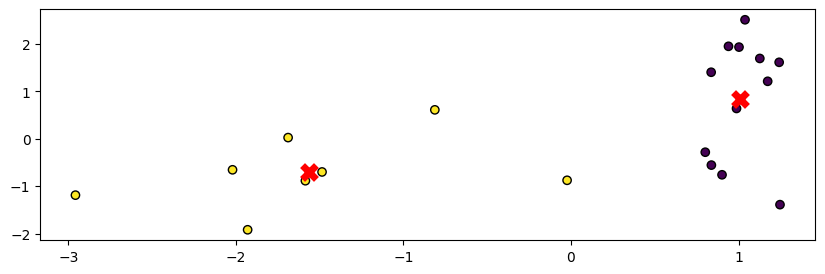

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=pred, edgecolors='k')
plt.scatter(x = centers[:, 0], y=centers[:, 1], c='r', marker='x', s=100, lw=5)
plt.show()

### cf Normalizer(스케일러) 적용

In [9]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor][:3]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667]])

In [10]:
model = KMeans(n_clusters=2,
              init='random',
              n_init='auto', #init가 k-means++이면 1, init가 random이면 10
              max_iter=300)
model.fit(Xnor)

KMeans(init='random', n_clusters=2, n_init='auto')

In [11]:
# 0그룹으로 분류된 Xnor
Xnor[model.labels_==0, 0] # x축
Xnor[model.labels_==0, 1] # y축

array([ 0.01539667, -0.99964925, -0.70515067,  0.60128094, -0.42571159,
       -0.37289833, -0.48721942, -0.30784666])

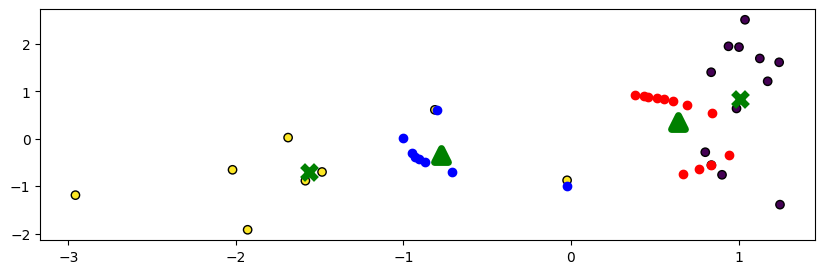

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=pred, edgecolors='k')
plt.scatter(x = centers[:, 0], y=centers[:, 1], c='g', marker='x', s=100, lw=5)
plt.scatter(x = Xnor[model.labels_==0, 0],
            y = Xnor[model.labels_==0, 1], c='b')
plt.scatter(x = Xnor[model.labels_==1, 0],
            y = Xnor[model.labels_==1, 1], c='r')
plt.scatter(x = model.cluster_centers_[:, 0],
            y = model.cluster_centers_[:, 1], c='g', marker='^', s=100, lw=5)
plt.show()

## K-Means 클러스터링의 한계점(13p)
- 군의 특성이 다를 경우
    * 군의 크기가 다른 경우
    * 군의 밀도가 다른 경우
    * 군이 비구형
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링

 ### 군의 크기가 다른 경우

In [16]:
np.random.seed(0)
# group0 : 평균-10, 표준편차2인 10행2열 배열
group0 = np.random.normal(loc=-10, scale=2, size=(10,2))
y = np.full(len(group0), 0)
group0 = np.c_[group0, y]
group0[:3]

array([[ -6.47189531,  -9.19968558,   0.        ],
       [ -8.04252403,  -5.5182136 ,   0.        ],
       [ -6.26488402, -11.95455576,   0.        ]])

In [19]:
# group1 : 평균10, 표준편차2인 10행2열 배열
group1 = np.random.normal(loc=10, scale=2, size=(10,2))
y = np.full(len(group1), 1)
group1 = np.c_[group1, y]
group1[:3]

array([[ 8.6550791 ,  9.28089368,  1.        ],
       [ 8.37370744,  6.5474348 ,  1.        ],
       [10.35485228,  9.19643813,  1.        ]])

In [20]:
# group2 : 평균0, 표준편차5인 100행2열 배열
group2 = np.random.normal(loc=0, scale=5, size=(100,2))
y = np.full(len(group2), 2)
group2 = np.c_[group2, y]
group2[:3]

array([[-5.8257492 ,  4.50413243,  2.        ],
       [ 2.3283122 , -7.68121843,  2.        ],
       [ 7.44126097,  9.47944588,  2.        ]])

In [22]:
data = np.r_[group0, group1, group2]
data[::10], data.shape

(array([[-6.47189531, -9.19968558,  0.        ],
        [ 8.6550791 ,  9.28089368,  1.        ],
        [-5.8257492 ,  4.50413243,  2.        ],
        [ 9.41575349, -6.73879531,  2.        ],
        [ 1.88212766, -5.49700395,  2.        ],
        [-7.45628796,  2.19695851,  2.        ],
        [-2.49016225,  9.64766027,  2.        ],
        [-1.76996956, -6.87475647,  2.        ],
        [-1.84590919, -1.19689589,  2.        ],
        [-4.779725  , -1.72990888,  2.        ],
        [-3.18718513, -1.98635907,  2.        ],
        [-5.94429629, -2.53408177,  2.        ]]),
 (120, 3))

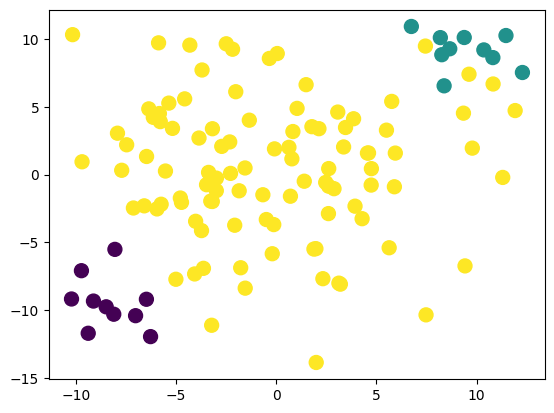

In [24]:
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,2], s=100)

In [25]:
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')
model.fit(data[:,:2])

KMeans(n_clusters=3, n_init='auto')

In [26]:
data[:, :2]

array([[ -6.47189531,  -9.19968558],
       [ -8.04252403,  -5.5182136 ],
       [ -6.26488402, -11.95455576],
       [ -8.09982316, -10.30271442],
       [-10.2064377 ,  -9.178803  ],
       [ -9.71191286,  -7.09145299],
       [ -8.47792455,  -9.75664997],
       [ -9.11227353,  -9.33265135],
       [ -7.01184185, -10.41031653],
       [ -9.3738646 , -11.70819148],
       [  8.6550791 ,   9.28089368],
       [  8.37370744,   6.5474348 ],
       [ 10.35485228,   9.19643813],
       [  6.73960331,  10.92556451],
       [  8.18540327,  10.10389079],
       [ 11.45818112,  10.25796582],
       [ 12.27880137,   7.53034836],
       [ 10.80468328,   8.63037982],
       [  8.2584057 ,   8.84230067],
       [  9.37689494,  10.11233068],
       [ -5.8257492 ,   4.50413243],
       [  2.3283122 ,  -7.68121843],
       [  7.44126097,   9.47944588],
       [  5.89389786,  -0.89962418],
       [ -5.35376311,   5.27225863],
       [ -2.01588473,   6.11222535],
       [  1.04137489,   4.88319518],
 

In [27]:
centers = model.cluster_centers_ # 중심점
centers

array([[-2.41031652, -6.0641759 ],
       [ 7.59201586,  5.25605355],
       [-2.68521318,  3.31314702]])

In [29]:
pred = model.predict(data[:, :2])
print(pred)
pred = model.labels_
print(pred)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 2 2 2 2 2 2 0 2 2 0 1 1 2
 2 1 1 0 2 2 2 1 2 2 2 2 0 2 2 1 2 0 2 0 0 0 0 2 1 2 0 1 1 0 2 0 2 0 0 0 2
 2 2 0 2 1 1 2 1 0 0 2 1 0 0 2 1 0 2 2 2 2 0 2 2 0 2 0 0 0 1 0 0 0 1 0 2 0
 2 2 2 2 0 1 0 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 2 2 2 2 2 2 0 2 2 0 1 1 2
 2 1 1 0 2 2 2 1 2 2 2 2 0 2 2 1 2 0 2 0 0 0 0 2 1 2 0 1 1 0 2 0 2 0 0 0 2
 2 2 0 2 1 1 2 1 0 0 2 1 0 0 2 1 0 2 2 2 2 0 2 2 0 2 0 0 0 1 0 0 0 1 0 2 0
 2 2 2 2 0 1 0 2 2]


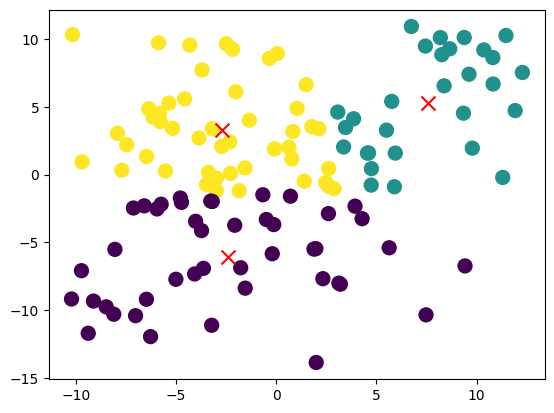

In [31]:
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100)
plt.scatter(x=centers[:,0], y=centers[:,1], c='r', s=100, marker='x')

In [32]:
# 위의 단점을 보완하고자 6개 그룹으로 clustering
model = KMeans(n_clusters=6, n_init=10)
model.fit(data[:, :2])

KMeans(n_clusters=6, n_init=10)

In [33]:
centers = model.cluster_centers_
pred = model.labels_
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4,
       0, 3, 5, 5, 3, 3, 5, 3, 4, 5, 5, 1, 0, 0, 5, 5, 3, 3, 4, 3, 1, 5,
       3, 1, 1, 5, 3, 4, 1, 3, 0, 5, 1, 5, 1, 4, 4, 1, 5, 3, 5, 2, 3, 3,
       4, 5, 1, 1, 4, 2, 4, 1, 5, 1, 4, 3, 3, 0, 1, 3, 4, 4, 3, 3, 3, 1,
       3, 0, 1, 1, 1, 3, 1, 1, 1, 5, 4, 3, 1, 1, 4, 0, 2, 4, 3, 3, 2, 5,
       1, 1, 1, 3, 1, 4, 0, 1, 3, 5])

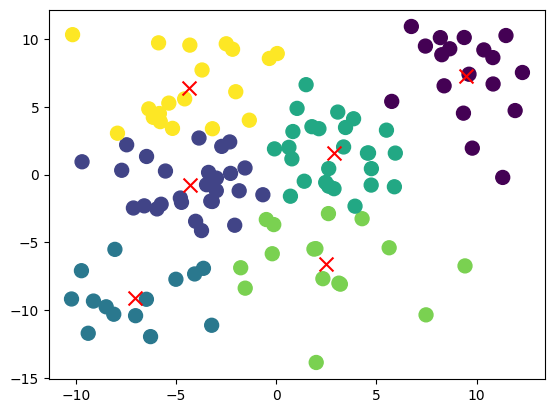

In [34]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100)
plt.scatter(x=centers[:,0], y=centers[:,1], c='r', s=100, marker='x')

In [37]:
data[pred==0, 0] # 0번 그룹의 x축 데이터

array([ 8.6550791 ,  8.37370744, 10.35485228,  6.73960331,  8.18540327,
       11.45818112, 12.27880137, 10.80468328,  8.2584057 ,  9.37689494,
        7.44126097,  9.61471013,  9.3377948 , 11.91572387, 10.81617975,
       11.29654475,  5.76165782,  9.77956154])

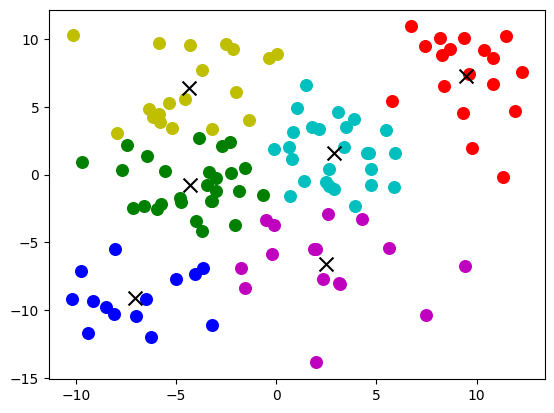

In [36]:
colors = ['r', 'g', 'b', 'c', 'm', 'y'] 
for i in range(len(colors)):
    plt.scatter(x=data[pred==i,0],
               y=data[pred==i,1], c=colors[i], s=70)
plt.scatter(x=centers[:,0], y=centers[:,1], c='k', s=100, marker='x')

# 3절 Hierarchical 클러스터링(계층적 군집분석)
- 계층적 분석(linkage) -> dendrogram -> fcluster를 이용해서 클러스터를 생성

    * 군끼리 묶으면서 최종적으로 하나의 군집이 될 때까지 군을 묶는 클러스터링 알고리즘
    * 군집의 수를 미리 정해주지 않아도 됨
    * Dendrogram을 이용하여 다양한 군집 수 시각화

In [1]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.2,setosa


In [2]:
# 계층적 군집결과와 맞추기 위한
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris.species)
iris.loc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [3]:
from scipy.cluster.hierarchy import linkage
# method = "single" : 가장 가까운 거리를 사용
# method = "complete" : 가장 먼 거리를 이용
cluster_model = linkage(iris, method="complete")
cluster_model.shape

(149, 4)

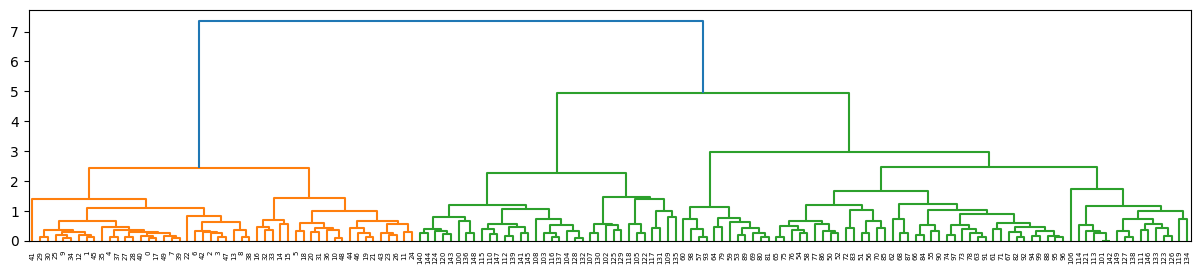

In [4]:
# dendrogram
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
dendrogram(cluster_model, labels=iris.index)
# 파일로 저장
plt.savefig('data/ch02_dendrogram.png', dpi=300)
plt.show()

In [5]:
# 클러서터링
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model, # linkage()로 만든 클러스터링 결과
        t=6, # 클러스터를 나누는 임계값(threshold)
        criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [6]:
pred = fcluster(cluster_model, 4, criterion='distance')
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [7]:

# pred에서 1은 0으로, 3은 1로, 2는 2로 변경
import numpy as np
np.choose([3, 3, 2, 1, 2], [0, 10, 20, 30]) # np.choose(인덱스, 값)

array([30, 30, 20, 10, 20])

In [8]:
# pred에서 1은 0으로, 3은 1로, 2는 2로 변경
adjusted_pred = np.choose(pred, [999, 0, 2, 1]) # 조정된 예측치(실제값:iris.species)
import pandas as pd
pd.crosstab(iris.species, adjusted_pred, rownames=['실제'], colnames=['예측'],
           margins=True) # 행과 열의 총계 추가

예측,0,1,2,All
실제,,,,
0,50,0,0,50
1,0,50,0,50
2,0,16,34,50
All,50,66,34,150


In [9]:
original_name = le.inverse_transform(iris.species)
pred_name = le.inverse_transform(adjusted_pred)
pd.crosstab(original_name, pred_name)

col_0,setosa,versicolor,virginica
row_0,,,
setosa,50,0,0
versicolor,0,50,0
virginica,0,16,34


<Axes: xlabel='petal_length', ylabel='petal_width'>

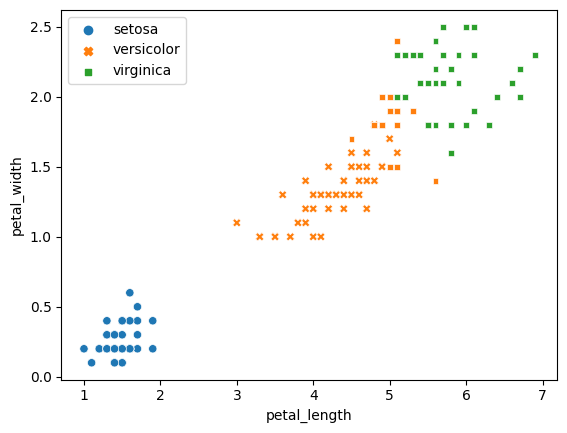

In [11]:
import seaborn as sns
sns.scatterplot(data=iris,
               x='petal_length', y='petal_width',
               hue=pred_name,
               style=original_name)

# 4절. DBSCAN 클러스터링
- 연결 기반(밀도기반) 군집화 알고리즘. 이상치를 자동 감지
- 단점: 클러스터의 밀도가 일정하지 않으면 성능이 낮아짐

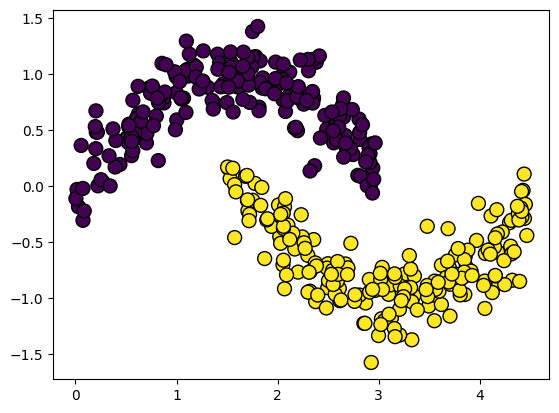

In [29]:
X1 = np.random.rand(200)*3 # 0 <= rand(데이터 갯수)*3 < 3.균등분포
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1)+noise
#plt.scatter(x=X1, y=Y1)
group1 = np.c_[X1, Y1, np.full(len(X1), 0)]


X2 = X1 + 1.5
noise = np.random.normal(0, 0.2, X1.shape)
Y2 = np.cos(X2)+noise
#plt.scatter(X2, Y2)
group2 = np.c_[X2,Y2,np.full(len(X2), 1)]

data = np.r_[group1, group2]
plt.scatter(x=data[:,0],
           y=data[:, 1], c=data[:,2], s=100, edgecolors='k')

In [30]:
# KMeans : 거리 기반 클러스터링
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='random', n_init=10)
model.fit(data[:, :2])
pred = model.predict(data[:, :2])

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

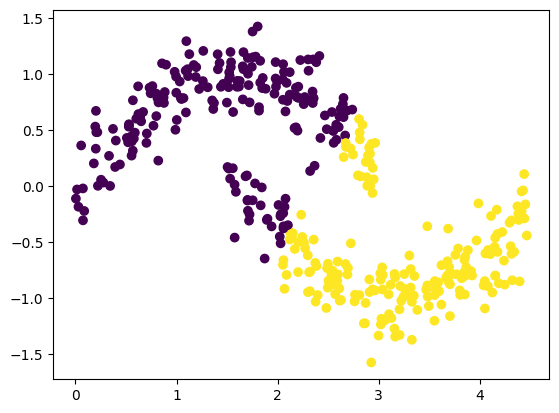

In [31]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred)

In [32]:
# 밀도 기반 DBSCAN
from sklearn.cluster import DBSCAN
# 반경(epsilon)이 0.3이내의 최소 10개 데이터씩 군집화
db_model = DBSCAN(eps=0.3, min_samples=10)
db_model.fit(data[:, :2])

DBSCAN(eps=0.3, min_samples=10)

In [38]:
label = db_model.labels_ # -1: 이상치 자동 감지
# 1그룹으로 분류된 data
n_noise = list(label).count(-1)
n_cluster = len(set(label)) - (1 if -1 in label else 0)
print('이상치 갯수:', n_noise, ', 예측된 클러스터 갯수 :', n_cluster)

이상치 갯수: 2 , 예측된 클러스터 갯수 : 2


In [39]:
-1 in label

True

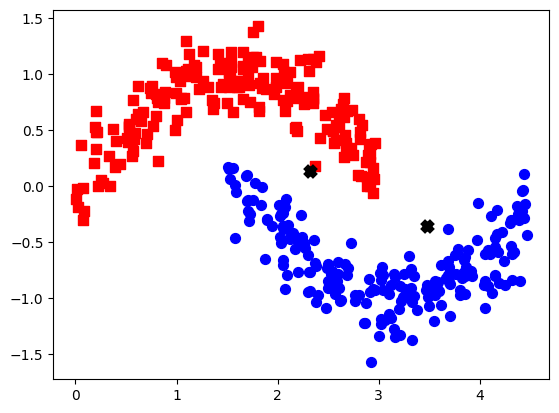

In [41]:
colors = ['r', 'b']
markers = ['s', 'o']
for i in range(n_cluster):
    plt.scatter(x = data[label==i, 0],
               y = data[label == i, 1], s=50, c=colors[i], marker=markers[i])
plt.scatter(x=data[label==-1,0],
           y=data[label==-1,1], s=50, c='k', marker='x', lw=5)

# 5절. 군집모형의 성능평가
- score함수를 통해 예측 모형 평가(분류, 회귀. 군집에서는 안 씀)
- metrics 모듈의 함수를 통해 군집 모형 평가
- 실루엣 계수(클러스터 소속과 갯수를 모를 때)
## 5.1 metrics 함수 이용

In [45]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,2


In [49]:
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:, -1]
iris_X.shape, iris_y.shape

((150, 4), (150,))

In [51]:
# 3개 그룹으로 군집화
iris_model3 = KMeans(n_clusters=3, random_state=1, n_init=10)
iris_model3.fit(iris_X)
pred = iris_model3.labels_
pred = iris_model3.predict(iris_X)

In [53]:
# pred 조정(1->0 0->1, 2->2) np.choose(인덱스들, 값들)
pred3=np.choose(pred,[1, 0, 2]) # 3개그룹으로 군집화한 결과

In [54]:
# 3개 그룹으로 군집화한 자료
print('실제값:', iris_y[::50])
print('예측값:', pred3)

실제값: 0      0
50     1
100    2
Name: species, dtype: int32
예측값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [55]:
# 2개 그룹으로 군집화
iris_model2 = KMeans(n_clusters=2, n_init=10, random_state=1)
iris_model2.fit(iris_X)
pred2 = iris_model2.labels_

In [56]:
# 2개 그룹으로 군집화한 자료
iris_y2 = np.array([0]*50 + [1]*100)
print('실제값 :', iris_y2)
print('예측값 :', pred2)

실제값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
예측값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### 조정된 rand 지수

In [57]:
# 3개 그룹
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris_y, #실제값
                   labels_pred=pred3) # 예측값

0.7302382722834697

In [58]:
# 2개 그룹 평가
adjusted_rand_score(labels_true=iris_y2,
                   labels_pred=pred2)

0.920405050901892

### 상호의존도를 나타내는 지표
- 두 군집간 정보 공유 정도

In [61]:
species_name = le.inverse_transform(iris_y) # 실제값 원형
pred_name = le.inverse_transform(pred3) # 예측값(이름)

In [64]:
# 3그룹 평가
from sklearn.metrics import mutual_info_score
print(mutual_info_score(iris.species, pred3))
print(mutual_info_score(species_name, pred_name))
print(mutual_info_score(species_name, pred3))

0.8255910976103356
0.8255910976103356
0.8255910976103356


In [65]:
# 2그룹 평가
mutual_info_score(iris_y2, pred2)

0.5596576064224734

### 그 외 클러스터링 성능평가 기준들

In [67]:
from sklearn.metrics import homogeneity_score
print('3그룹:', homogeneity_score(iris.species, pred3))
print('3그룹:', homogeneity_score(species_name, pred_name))
print('2그룹:', homogeneity_score(iris_y2, pred2))

3그룹: 0.7514854021988338
3그룹: 0.7514854021988338
2그룹: 0.8792539652679946


In [68]:
from sklearn.metrics import completeness_score
print('3그룹:', completeness_score(iris.species, pred3))
print('3그룹:', completeness_score(species_name, pred_name))
print('2그룹:', completeness_score(iris_y2, pred2))

3그룹: 0.7649861514489815
3그룹: 0.7649861514489815
2그룹: 0.861693475999054


In [69]:
# homogeneity_score와 completeness_score의 조화평균
from sklearn.metrics import v_measure_score
print('3그룹 :', v_measure_score(iris.species, pred3))
print('3그룹 :', v_measure_score(species_name, pred_name))
print('2그룹 :', v_measure_score(iris_y2, pred2))

3그룹 : 0.7581756800057784
3그룹 : 0.7581756800057784
2그룹 : 0.870385156563164


## 5.2 실루엣 계수

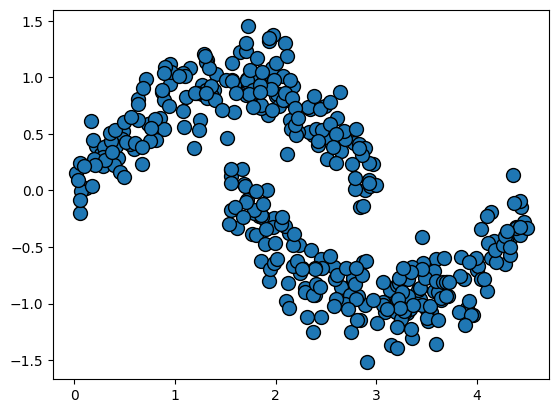

In [79]:
np.random.seed(0)
X1 = np.random.rand(200)*3 # 0<= rand(데이터 갯수)*3 < 3.균등분포
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1)+noise
#plt.scatter(x=X1, y=Y1)
group1 = np.c_[X1, Y1, np.full(len(X1), 0)]

X2 = X1 +  1.5
noise = np.random.normal(0, 0.2, X1.shape)
Y2 = np.cos(X2) + noise
#plt.scatter(X2, Y2)
group2 = np.c_[X2, Y2, np.full(len(X2), 1)]

data = np.r_[group1, group2]
plt.scatter(x=data[:, 0],
            y=data[:, 1], s=100, edgecolors='k')
plt.show()

In [74]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_cluster in range_n_clusters:
    model = KMeans(n_clusters=n_cluster,
                  n_init=10,
                  random_state=2)
    model.fit(data[:, :-1])
    score = silhouette_score(X=data[:, :-1], labels=model.labels_)
    print("클러스터 수: {}, 실루엣 계수: {}".format(n_cluster, score))
# 실루엣 계수가 가장 높은 6개로 클러스터링을 할 예정

클러스터 수: 2, 실루엣 계수: 0.5229478011885297
클러스터 수: 3, 실루엣 계수: 0.44729145535616893
클러스터 수: 4, 실루엣 계수: 0.44479875177575096
클러스터 수: 5, 실루엣 계수: 0.4561486241348085
클러스터 수: 6, 실루엣 계수: 0.4984969409446831
클러스터 수: 7, 실루엣 계수: 0.488503869708437
클러스터 수: 8, 실루엣 계수: 0.4807642797749051
클러스터 수: 9, 실루엣 계수: 0.4706460435665909
클러스터 수: 10, 실루엣 계수: 0.4617130474077822


In [76]:
model = KMeans(n_clusters=6, init='random', n_init=10)
model.fit(data[:, :-1])
pred = model.labels_
pred = model.predict(data[:, :-1])

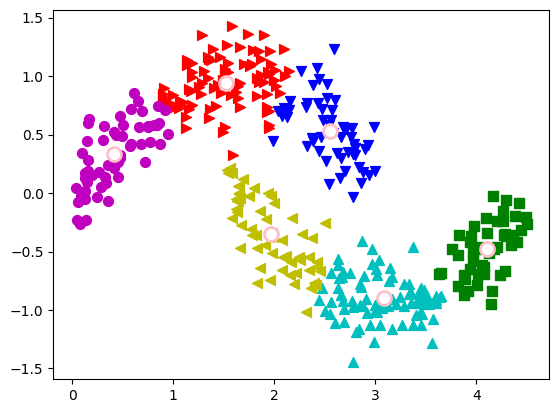

In [78]:
centers = model.cluster_centers_
colors = ['r','g','b','c','m','y']
markers = ['>', 's', 'v', '^','o','<']
# 0 클러스터로 분류된 데이터
# data[pred==6]
for i, c in enumerate(centers):
    # print(i, c)
    plt.scatter(x=data[pred==i, 0],
               y=data[pred==i, 1], s=50, c=colors[i], marker=markers[i])
    plt.scatter(c[0], c[1], s=100, c='w', edgecolors='pink', lw=2)

# 6절. 연습문제